#### About
> Markov chain monte carlo

Markov Chain Monte Carlo (MCMC) is a computational method that uses random sampling to estimate complex probability distributions. It is particularly useful in Bayesian statistics, where it is used to sample from the posterior distribution of a parameter of interest. The basic idea behind MCMC is to use a Markov chain to generate a sequence of samples from the desired distribution, and then to use these samples to estimate its properties.

One common use case for MCMC is in Bayesian inference, where it is used to estimate the posterior distribution of a parameter given some data. For example, suppose we are interested in estimating the proportion of defective items in a production process. We might model this as a binomial distribution with an unknown parameter p, and use MCMC to estimate the posterior distribution of p based on some observed data.

In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

In [2]:
# Generate some fake data
n = 1000
p_true = 0.7
y = np.random.binomial(n, p_true)


In [3]:
# Define the model
with pm.Model() as model:
    p = pm.Beta('p', alpha=1, beta=1)
    y_obs = pm.Binomial('y_obs', n=n, p=p, observed=y)
    
    # Run the MCMC algorithm
    trace = pm.sample(10000, tune=5000, cores=1)

/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...


Sampling 2 chains for 5_000 tune and 10_000 draw iterations (10_000 + 20_000 draws total) took 16 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


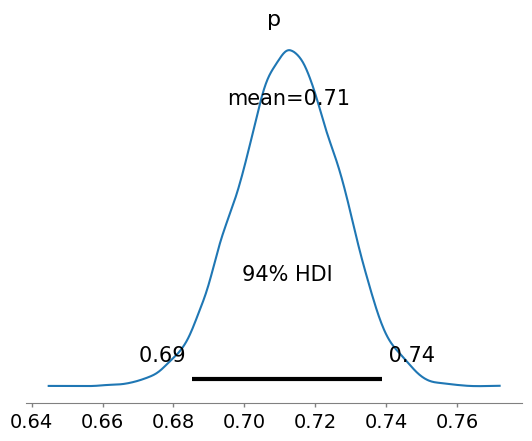

In [4]:
# Plot the posterior distribution of p
pm.plot_posterior(trace)
plt.show()